In [146]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import src.utils as utils

In [221]:
df = pd.read_csv(r"dataset/lenta-news-25k.csv")

## LDA
#### 1 ngram

In [4]:
count_vec1 = CountVectorizer(min_df=20, ngram_range=(1,1))
count_vec_matrix = count_vec1.fit_transform(df['lemma'])

In [5]:
lda1 = LDA(n_components=10, max_iter=15, verbose=1, random_state=111, n_jobs=3)
lda_matrix1 = lda1.fit_transform(count_vec_matrix)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


<Figure size 432x288 with 0 Axes>

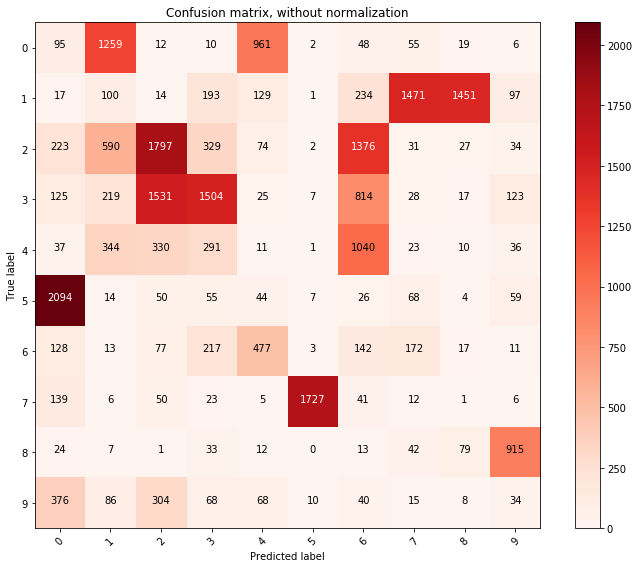

In [9]:
lda_labels1  = utils.get_lda_labels(lda_matrix1)
cm = confusion_matrix(df['labels'], lda_labels1)
utils.plot_confusion_matrix(cm, classes=range(10))

### 1-2 ngram

In [10]:
count_vec2 = CountVectorizer(min_df=20, ngram_range=(1,2))
count_vec_matrix = count_vec2.fit_transform(df['lemma'])

In [11]:
lda2 = LDA(n_components=10, max_iter=15, verbose=1, random_state=111, n_jobs=3)
lda_matrix = lda2.fit_transform(count_vec_matrix)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


<Figure size 432x288 with 0 Axes>

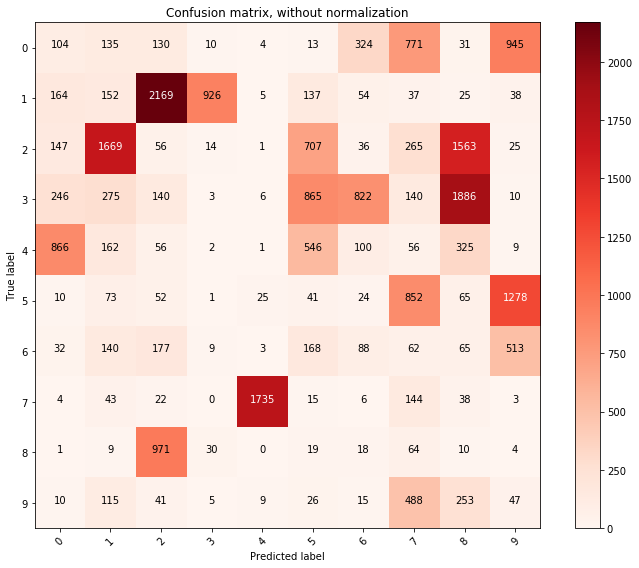

In [13]:
lda_labels2 = utils.get_lda_labels(lda_matrix)
cm = confusion_matrix(df['labels'], lda_labels2)
utils.plot_confusion_matrix(cm, classes=range(10))

In [14]:
count_vec3 = CountVectorizer(min_df=20, ngram_range=(2,3))
count_vec_matrix = count_vec3.fit_transform(df['lemma'])

In [15]:
lda3 = LDA(n_components=10, max_iter=15, verbose=1, random_state=111, n_jobs=3)
lda_matrix3 = lda3.fit_transform(count_vec_matrix)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


<Figure size 432x288 with 0 Axes>

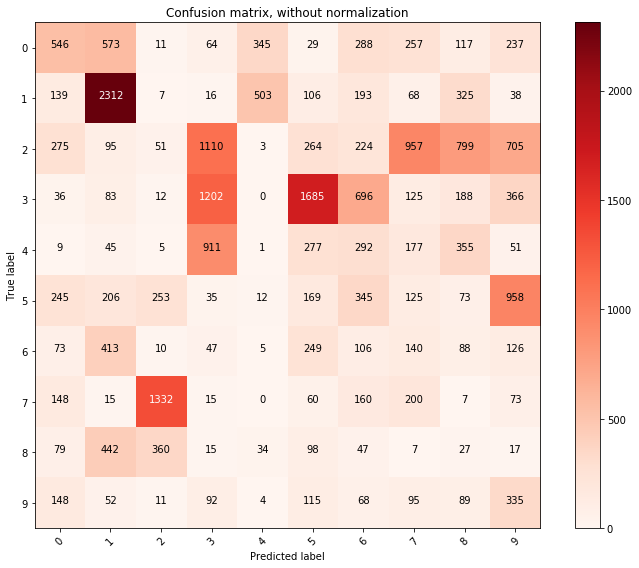

In [16]:
lda_labels3  = utils.get_lda_labels(lda_matrix3)
cm = confusion_matrix(df['labels'], lda_labels3)
utils.plot_confusion_matrix(cm, classes=range(10))

### 1-3 ngram

In [18]:
count_vec4 = CountVectorizer(min_df=20, ngram_range=(1,3))
count_vec_matrix = count_vec4.fit_transform(df['lemma'])

In [20]:
lda4 = LDA(n_components=10, max_iter=15, verbose=1, random_state=111, n_jobs=3)
lda_matrix4 = lda4.fit_transform(count_vec_matrix)

iteration: 1 of max_iter: 15
iteration: 2 of max_iter: 15
iteration: 3 of max_iter: 15
iteration: 4 of max_iter: 15
iteration: 5 of max_iter: 15
iteration: 6 of max_iter: 15
iteration: 7 of max_iter: 15
iteration: 8 of max_iter: 15
iteration: 9 of max_iter: 15
iteration: 10 of max_iter: 15
iteration: 11 of max_iter: 15
iteration: 12 of max_iter: 15
iteration: 13 of max_iter: 15
iteration: 14 of max_iter: 15
iteration: 15 of max_iter: 15


<Figure size 432x288 with 0 Axes>

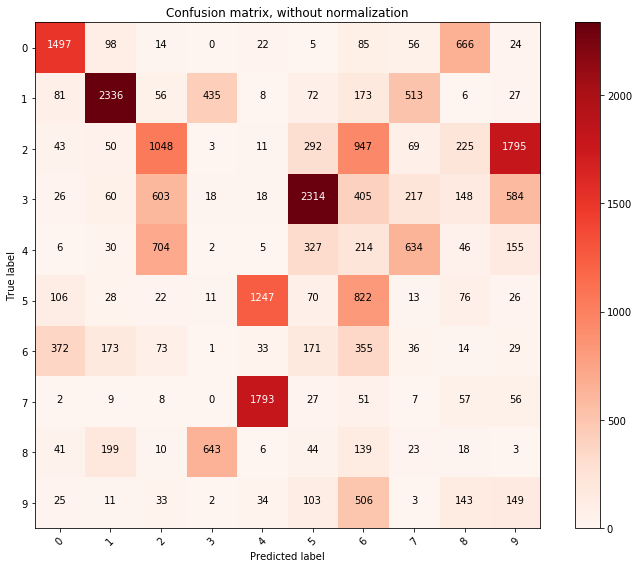

In [21]:
lda_labels4  = utils.get_lda_labels(lda_matrix4)
cm = confusion_matrix(df['labels'], lda_labels4)
utils.plot_confusion_matrix(cm, classes=range(10))

### Knn для финальной классификации

In [153]:
df_labels = pd.DataFrame([lda_labels1, lda_labels2, lda_labels3, lda_labels4]).T

In [155]:
X = df_labels.iloc[:20000]
y = df['labels'].iloc[:20000]
X_test = df_labels.iloc[20000:]
y_test = df['labels'].iloc[20000:]
metrics = []
for k in range(1,101,2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted' )
    metrics.append(f1)
print(f"Наилучший результат с числом соседей -- {np.argmax(metrics)}")

Наилучший результат с числом соседей -- 10


In [156]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(df_labels, df['labels'])
final_labels = neigh.predict(df_labels)

<Figure size 432x288 with 0 Axes>

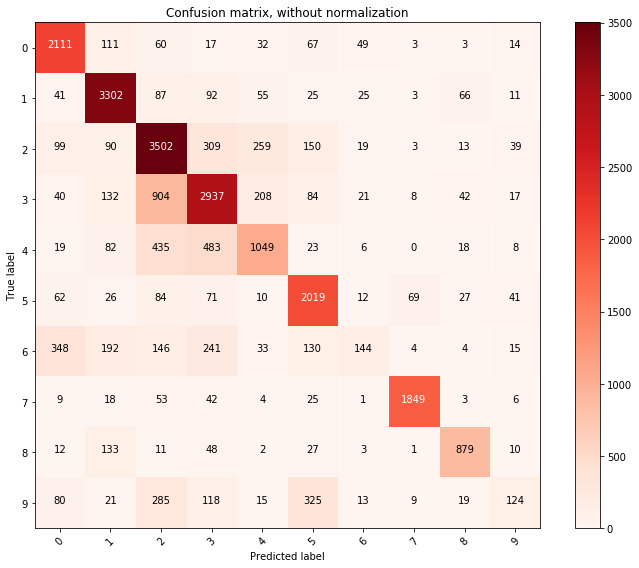

In [157]:

cm = confusion_matrix(df['labels'], final_labels)
utils.plot_confusion_matrix(cm, classes=range(10))

In [158]:
print(classification_report(df['labels'], final_labels))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2467
           1       0.80      0.89      0.85      3707
           2       0.63      0.78      0.70      4483
           3       0.67      0.67      0.67      4393
           4       0.63      0.49      0.55      2123
           5       0.70      0.83      0.76      2421
           6       0.49      0.11      0.19      1257
           7       0.95      0.92      0.93      2010
           8       0.82      0.78      0.80      1126
           9       0.44      0.12      0.19      1009

    accuracy                           0.72     24996
   macro avg       0.69      0.65      0.64     24996
weighted avg       0.70      0.72      0.70     24996



In [152]:
for i, model in enumerate([lda1, lda2, lda3, lda4, count_vec1, count_vec2, count_vec3, count_vec4]):
    if i<4:
        name = f"lda{i}.joblib"
    else:
        name = f"count_vec{i}.joblib"
    save_model(model, name)

In [159]:
save_model(neigh, name='Knn.joblib')

#### df with 10 top words

In [161]:
tf_idf = TfidfVectorizer(max_df=0.8, min_df=40, ngram_range=(1,1))
tfidf_matrix = tf_idf.fit_transform(df['lemma'])

In [165]:
clusters_names=dict(zip(df['labels'], df['topic']))
utils.get_top_keywords(tfidf_matrix, final_labels, tf_idf.get_feature_names(), clusters_names)